# Machine Learning

## Regresion Lineal

In [46]:
import pandas as pd
import numpy as np

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

In [48]:
vehiculos = pd.read_csv("data/vehiculos_procesado.csv", 
                 usecols=["consumo", "co2", "cilindros","desplazamiento"])


litros_por_galon =  3.78541
vehiculos["consumo_litros_milla"] = litros_por_galon/ vehiculos.consumo



In [49]:
vehiculos.shape

(35539, 5)

In [50]:
vehicles.head()

,desplazamiento,cilindros,consumo,co2,intake_liter_mile
0,2.5,4.0,17,522.764706,0.222671
1,4.2,6.0,13,683.615385,0.291185
2,2.5,4.0,16,555.437500,0.236588
3,4.2,6.0,13,683.615385,0.291185
4,3.8,6.0,16,555.437500,0.236588


El modelo de regresión lineal mediante OLS (ordinary least squares) tiene la forma:

                                𝑦̂ =𝛼+𝛽1∗𝑥1+𝛽2∗𝑥2+...+𝛽𝑛∗𝑥𝑛+𝜀

Donde **𝑦̂** es la predicción que queremos hacer, **𝛼** es el término independiente, **𝛽𝑛** es un vector de coeficientes y **𝑥𝑛** son los valores de las variables del dataset. El objetivo es obtener **𝛼** y **𝛽𝑛** tales que error cuadrático (residuo) , definido como:

                                𝑅𝑆𝑆=𝜀²=∑𝑖=1𝑛(𝑦𝑖−(𝛼−𝛽𝑖𝑥𝑖))2

sea el mínimo.

Para ello tenemos que resolver las siguientes equaciones

                                   𝛼̂ =𝑦¯−𝛽̂ ∗𝑥¯ 
                                   𝛽̂ =(𝑋𝑇𝑋)−1𝑋𝑇𝑦 

Para obtener los coeficientes del modelo dedicamos una fracción del dataset a entrenar y otra a evaluar los resultados (para evitar sobreajuste o sobregeneralización)

In [51]:
pct_entrenamiento = 0.8

In [52]:
vehiculos_training = vehiculos.sample(frac=pct_entrenamiento)


vehiculos_test = vehiculos[~vehiculos.index.isin(vehiculos_training.index)]

print(vehiculos_training.shape)
print(vehiculos_test.shape)

(28431, 5)
(7108, 5)


In [53]:
variables_independientes = ['desplazamiento', 'cilindros','consumo_litros_milla']
variable_dependiente = 'co2'
X = vehiculos_training[variables_independientes].as_matrix()
y = vehiculos_training[variable_dependiente].as_matrix()
X_T = X.T

C:\Users\manu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\manu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [54]:
X

array([[2.5       , 4.        , 0.18025762],
       [4.3       , 6.        , 0.23658813],
       [3.        , 6.        , 0.21030056],
       ...,
       [3.2       , 6.        , 0.21030056],
       [3.8       , 6.        , 0.21030056],
       [2.3       , 4.        , 0.1514164 ]])

In [55]:
y

array([423.19047619, 555.4375    , 493.72222222, ..., 493.72222222,
       493.72222222, 355.48      ])

In [56]:
betas = np.linalg.inv(X_T @ X) @ X_T @ y
betas

array([ 3.69595447e+00, -5.76390039e-01,  2.30641103e+03])

In [57]:
y.mean()

470.43661403027

In [58]:
alfa = y.mean() - np.dot(betas,vehiculos_training[variables_independientes].mean().as_matrix())
alfa

C:\Users\manu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.3539591541214122

In [59]:
def predecir(r):
    return alfa + np.dot(betas, r.values)

In [60]:
vehiculos_training["co2_pred"] = vehiculos_training[variables_independientes].apply(
    predecir, axis=1)
vehiculos_test["co2_pred"] = vehiculos_test[variables_independientes].apply(predecir, axis=1)

C:\Users\manu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
model_formula = "y ~ {alfa:.3f} + {beta_1:.2f}*desplazamiento + {beta_2:.2f}*cilindros + {beta_3:.3f}*consumo_litros_milla".format(
    alfa=alfa, beta_1=betas[0], beta_2=betas[1], beta_3=betas[2])
model_formula

'y ~ 0.354 + 3.70*desplazamiento + -0.58*cilindros + 2306.411*consumo_litros_milla'

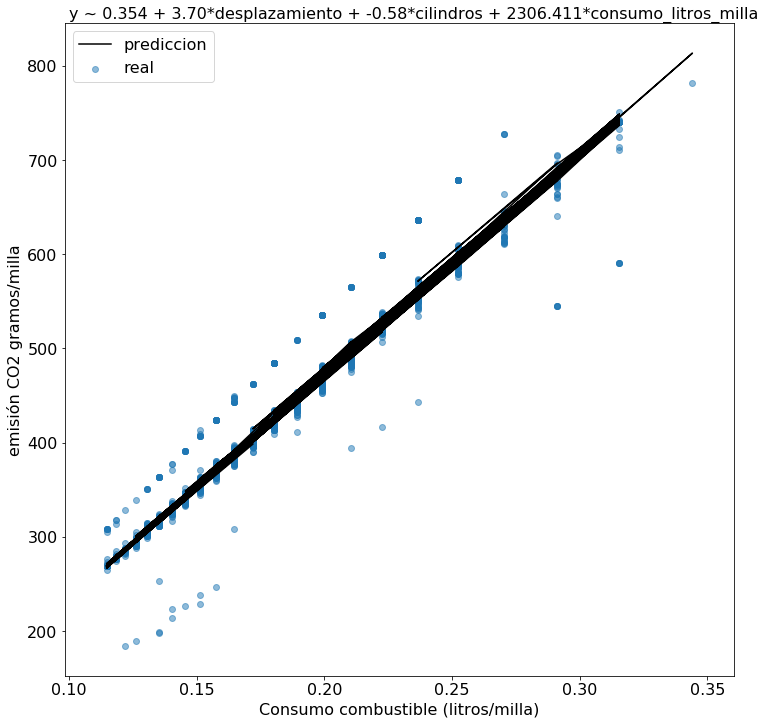

In [62]:
plt.scatter(vehiculos_test.consumo_litros_milla, vehiculos_test.co2, alpha=0.5, label="real")
plt.text(0.1, 850, model_formula)
plt.plot(vehiculos_test.consumo_litros_milla,vehiculos_test.co2_pred, c="black", label="prediccion")
plt.xlabel("Consumo combustible (litros/milla)")
plt.ylabel("emisión CO2 gramos/milla")
plt.legend();

In [63]:
def error_cuadrático_medio(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

In [64]:
error_training = error_cuadrático_medio(vehiculos_training.co2, vehiculos_training.co2_pred)
error_training

124.3953219307895

In [65]:
error_test = error_cuadrático_medio(vehiculos_test.co2, vehiculos_test.co2_pred)
error_test

158.9725679961479

### Regresion Lineal con sklearn

Para prácticar el Análisis Exploratorio de Datos, vamos a usar una versión modificada del dataset [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) que contiene información sobre películas, información relacionada con el éxito de dichas películas en cuanto a popularidad y venta de entradas.

El dataset se encuentra en el archivo `data/movies.csv`, y consta de las siguientes columnas:

```
    belongs_to_collection (franquicia): Nombre de la franquicia a la cual pertenece la película.
    budget (presupuesto): Presupuesto de la película en dólares.
    genres (genero): Género de la pelicula.
    homepage (pagina_web): Página Web oficial de la película.
    imdb_id: ID de la película en IMDB.
    original_language (lenguaje): El lenguage original en el que se rodó la película.
    overview: Descripción de la película.
    popularity (popularidad): Puntuación de Popularidad.
    poster_path (poster): url del poster de la película
    production_companies (productores): Lista de compañias que produjeron la pelicula
    production_countries (pais): Pais de produccion de la película
    release_date (fecha_estreno): Fecha del estreno  de la película
    revenue (ventas): Ventas de entradas en dólares de la película.
    runtime (duracion): Duración en minutos de la película.
    status (estado): Estado de la película (estrenada, en producción, etc).
    tagline: Frase descriptiva de la película.
    title (titulo): Título de la película.
    vote_average (puntuacion): Puntuación media de la película.
    vote_count (n_votos): Número de votos.
```



Vamos a usar el dataset de películas. Para este ejercicio la variable objetivo es las ventas en taquilla de la película (la columna `revenue`)

In [130]:
pelis = pd.read_csv("data/movies.csv")
pelis.head()

,franquicia,presupuesto,genero,pagina_web,imdb_id,lenguaje,popularidad,productores,pais,fecha_estreno,ventas,duracion,estado,titulo,puntuacion,n_votos
0,Father of the Bride Collection,NaN,Comedy,NaN,tt0113041,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,NaN,NaN,Drama,NaN,tt0112749,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,http://www.newline.com/properties/friday.html,tt0113118,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,NaN,NaN,Comedy,NaN,tt0115697,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,NaN,12000000.0,Comedy,NaN,tt0116483,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0


In [131]:
independientes = pelis.select_dtypes([np.int64, np.float64])
dependiente = pelis["ventas"]

In [132]:
independientes = independientes.fillna(0.000)
independientes = independientes.drop("ventas",axis=1)
independientes.head()

,presupuesto,popularidad,duracion,puntuacion,n_votos
0,0.0,8.387519,106.0,5.7,173.0
1,0.0,0.894647,106.0,6.7,13.0
2,3500000.0,14.569650,91.0,7.0,513.0
3,0.0,8.963037,87.0,6.0,124.0
4,12000000.0,9.592265,92.0,6.5,767.0


In [133]:
dependiente=dependiente.fillna(0.000)
dependiente.head()

0    76578911.0
1      676525.0
2    28215918.0
3          32.0
4    41205099.0
Name: ventas, dtype: float64

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
modelo = LinearRegression()

In [136]:
modelo.fit(X=independientes, y=dependiente)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
modelo.coef_

array([ 1.22671818e+00, -2.86498152e+05,  4.72544841e+04,  5.48802981e+05,
        6.68634838e+04])

In [138]:
pelis["ventas_pred"]=modelo.predict(independientes)

In [141]:
from sklearn import metrics

Error cuadrático absoluto

In [143]:
metrics.mean_absolute_error(pelis["ventas"].fillna(0),pelis["ventas_pred"])

19530438.969785903

Raiz error cuadrático medio

In [145]:
np.sqrt(metrics.mean_squared_error(pelis["ventas"].fillna(0),pelis["ventas_pred"]))

38517729.45375325

Coeficiente de determinación

In [148]:
metrics.r2_score(pelis["ventas"].fillna(0),pelis["ventas_pred"])

0.6051462764566803